# Let's talk about DataFrames (100 Points)
In DATA 542 we learn much about DataFrames. What is the real advantage of DataFrames? In this lab, you will explore a bit by analyzing data, using the concepts learned in lectures 2 and 3. 

## Dataset
There are three datasets:
1. Bison-observation-2002.csv
2. Bison-dataset2.csv
3. NPSpecies_ABLI.xlsx


## Part I (25 Points)
The first dataset (Bison-observation-2002.csv) contains parts of the observation of Bisons in Wood Buffalo National Park in 2002. 
For the following questions, use **Python only (not Pandas)** to read the dataset and do the analytics.
1. What is the sum of the Bisons observed in the dataset? (10 points)
2. How many different types of Bisons are observed in the 'Sub Population' column? (10 points)

**Provide your code and answer** in the following.

In [1]:
import csv

In [34]:
# code
csv_file_path = 'Bison-observation-2002.csv'
data = []
with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)
    
    for row in csv_reader:
        data.append(row)

index = data[0].index('Count')
sum = 0
bison_type = []
for i in range(2, len(data)):
    bison_type.append(data[i][1])
    if data[i][index] != '' and data[i][index] != ' ':
        sum += int(data[i][index])
print("Number of Bisons observed is", sum)

unique_types = len(set(bison_type))

print("Unique types of Bisons observed is", unique_types)

Number of Bisons observed is 1560
Unique types of Bisons observed is 5


## Part II (25 Points)
Use the same dataset in Part I and answer the following questions using DataFrames:
3. What is the sum of the Bisons observed in the dataset? (10 points)
4. How many different types of Bisons are observed in the 'Sub Population' column? (10 points)

**Provide your code and answer** in the following.

In [60]:
import pandas as pd
import numpy as np

In [87]:
# code
csv_file_path = 'Bison-observation-2002.csv'
df = pd.read_csv(csv_file_path)
df.drop(0, inplace=True)
df.replace('nan', '0', inplace=True)
b_sum = int(df['Count'].astype(float).sum())
print("Number of Bisons observed is", b_sum)

b_types = len(df['Sub Population'].unique())
print("Unique types of Bisons observed is", b_types)

Number of Bisons observed is 1560
Unique types of Bisons observed is 5


## Part III (25 points)
In this section, we will use the visualization packages to explore the missing values. 

Use the missingno package to explore the percentage of missing values in Bison-dataset2.csv dataset. 

5. What columns can be imputed with other values based on your observations? (10 points)
6. Which columns should be omitted? (10 points)
7. For the columns you find that can be imputed, write code to replace the null values. (10 points)

**Provide your code and answer** in the following.

In [95]:
import missingno as msno
import matplotlib.pyplot as plt

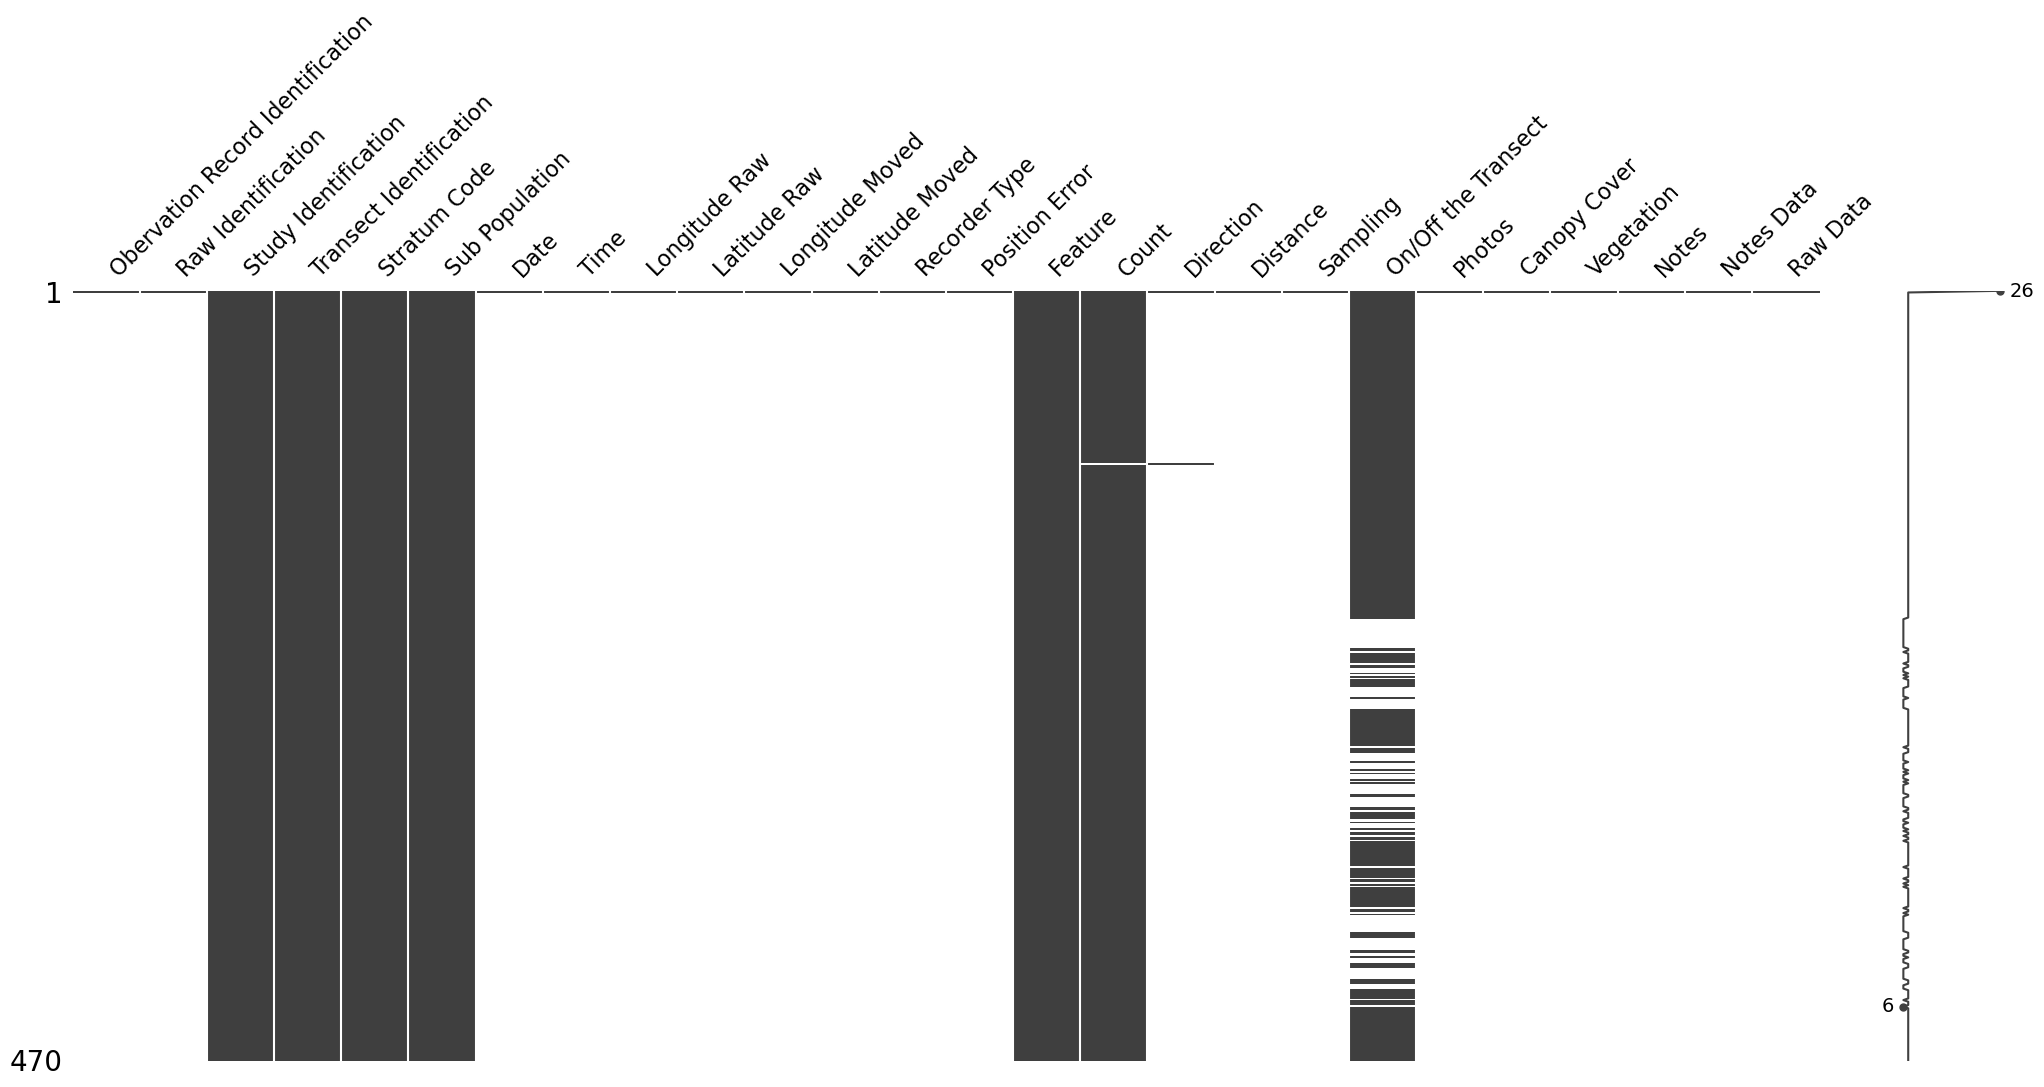

The 'Count' and 'On/Off Transect' columns can be imputed
The 'Date', 'Time', 'Longitude Raw', 'Latitude Raw',
       'Longitude Moved', 'Latitude Moved', 'Recorder Type', 'Position Error', 'Direction', 'Distance', 'Sampling', 'Photos', 'Canopy Cover', 'Vegetation', 'Notes',
       'Notes Data' and 'Raw Data' can all be omitted because they are empty. 


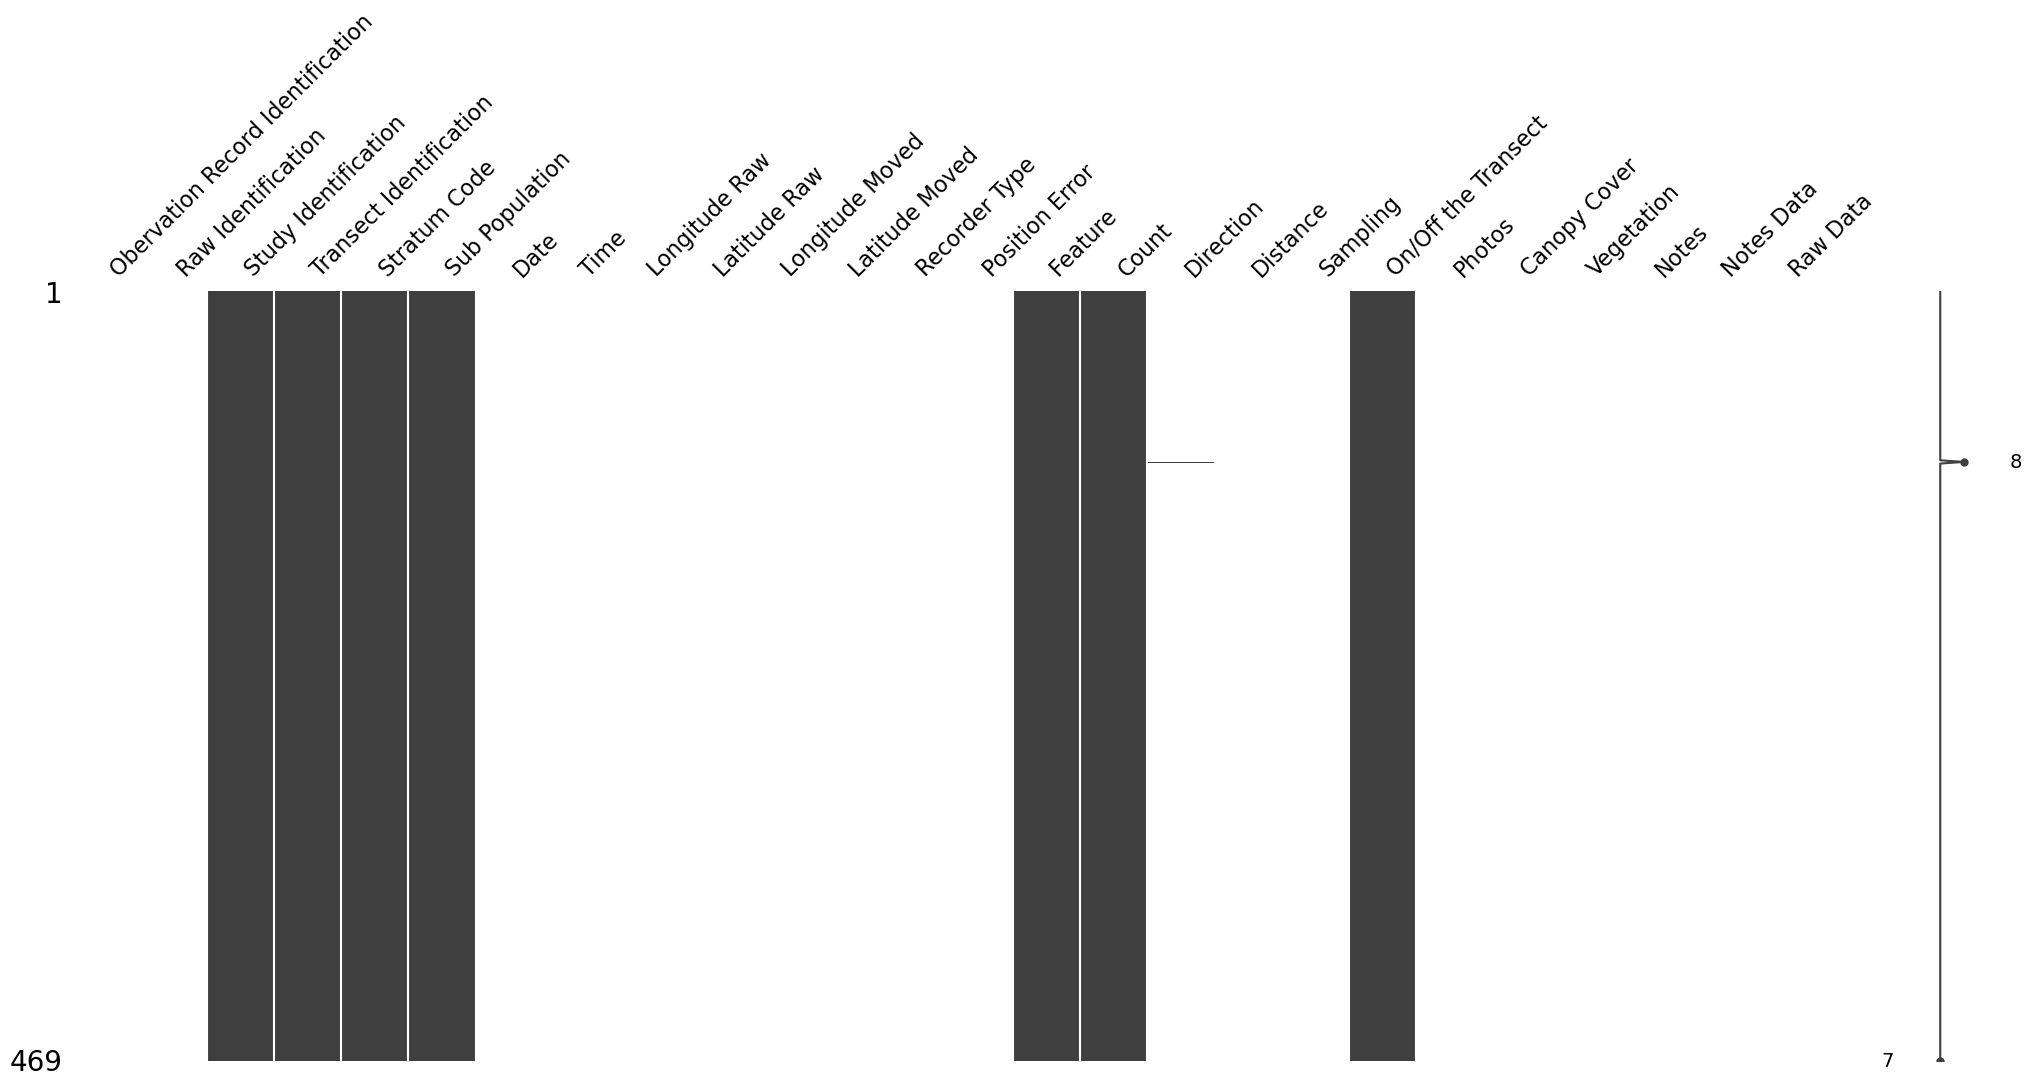

In [116]:
# code
df = pd.read_csv('Bison-dataset2.csv')
msno.matrix(df)
plt.show()

print("The 'Count' and 'On/Off Transect' columns can be imputed")

print("""The 'Date', 'Time', 'Longitude Raw', 'Latitude Raw',
       'Longitude Moved', 'Latitude Moved', 'Recorder Type', 'Position Error', 'Direction', 'Distance', 'Sampling', 'Photos', 'Canopy Cover', 'Vegetation', 'Notes',
       'Notes Data' and 'Raw Data' can all be omitted because they are empty. """)

df.drop(0, inplace=True)
mean = int(df['Count'].astype(float).mean())
df['Count'].replace(np.nan, mean, inplace=True)
df['On/Off the Transect'].replace(np.nan, 'OFF', inplace=True)

msno.matrix(df)
plt.show()

## Part IV (25 points)
Load the third dataset NPSpecies_ABLI.xlsx in Pandas. 

Note: You may receive an error that mentions you need to install another library. 

8. How many different categories are there in the 'Category' column? (10 points)
9. How many data records are there in each of the categories you extracted in question 8? (10 points)
10. Which data records have value 'Inactive' for 'Taxon Record Status' column? (10 points)

In [120]:
import openpyxl

In [143]:
# code
df = pd.read_excel("NPSpecies_ABLI.xlsx")
num_cat = len(df['Category'].unique())
print('There are', num_cat, "different categories")


first = len(df[df['Category'] == list(df['Category'].unique())[0]]['Category'])
sec = len(df[df['Category'] == list(df['Category'].unique())[1]]['Category'])
third = len(df[df['Category'] == list(df['Category'].unique())[2]]['Category'])

print(list(df['Category'].unique())[0], "is", first, 'observations')
print(list(df['Category'].unique())[1], "is", sec, 'observations')
print(list(df['Category'].unique())[2], "is", third, 'observations')


df[df['Taxon Record Status'] == 'Inactive']


There are 3 different categories
Mammal is 38 observations
Bird is 131 observations
Fish is 10 observations


,Park Code,Park Name,Category,Category Sort,Order,Family,Taxon Code,TSN,Taxon Record Status,Scientific Name,Common Names,Synonyms,Occurrence
16,ABLI,Abraham Lincoln Birthplace National Historical...,Mammal,1,Chiroptera,Vespertilionidae,695948,-756551,Inactive,Perimyotis subflavus,tri-colored bat,Pipistrellus subflavus,Present
112,ABLI,Abraham Lincoln Birthplace National Historical...,Bird,2,Passeriformes,Parulidae,168055,-505796,Inactive,Helmitheros vermivorum,worm-eating warbler,Helmitheros vermivorus,Present
119,ABLI,Abraham Lincoln Birthplace National Historical...,Bird,2,Passeriformes,Parulidae,168057,-505797,Inactive,Seiurus aurocapilla,ovenbird,Seiurus aurocapillus,Present
